# WEEK 1 : Exploring Data Basic
# Project 2 : Movie Ratings Analysis

## Commands to Install Required Libraries
## pip install pandas matplotlib seaborn wordcloud



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset

In [ ]:
data = pd.read_csv('imdb.csv')

# Ensure the dataset has the required columns

In [ ]:
required_columns = ['Movie_name', 'Rating_from_10', 'Genre', 'Year']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Dataset must contain '{col}' column")

# Data Preprocessing

In [ ]:
data = data[required_columns]
data.dropna(subset=['Movie_name', 'Rating_from_10', 'Genre', 'Year'], inplace=True)

# Clean the 'Year' column to remove non-numeric characters

In [5]:
data['Year'] = data['Year'].str.extract(r'(\d{4})')  
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  
data.dropna(subset=['Year'], inplace=True)  
data['Year'] = data['Year'].astype(int)

# Ensure 'Rating_from_10' is numeric

In [6]:
data['Rating_from_10'] = pd.to_numeric(data['Rating_from_10'], errors='coerce')
data.dropna(subset=['Rating_from_10'], inplace=True)

# Find the Most Popular Genres

In [7]:
popular_genres = data['Genre'].str.split(', ').explode().value_counts()

# Calculate Average Ratings for Each Genre

In [8]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
avg_ratings_per_genre = data.groupby('Genre')['Rating_from_10'].mean().sort_values(ascending=False)

# Visualize Trends in Movie Ratings Over Time

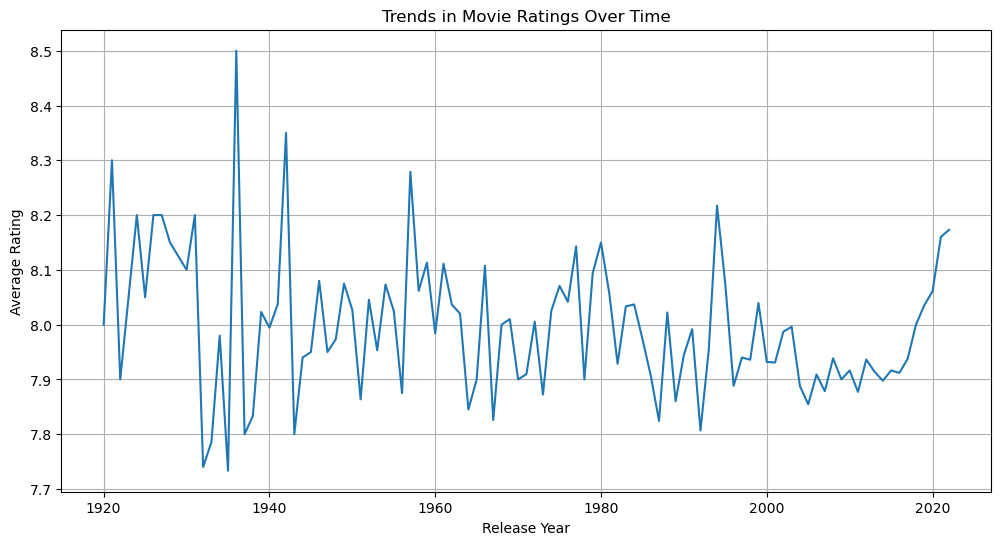

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Year', y='Rating_from_10', errorbar=None)
plt.title('Trends in Movie Ratings Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Wrd Cloud for Frequent Keywords in Movie Titles

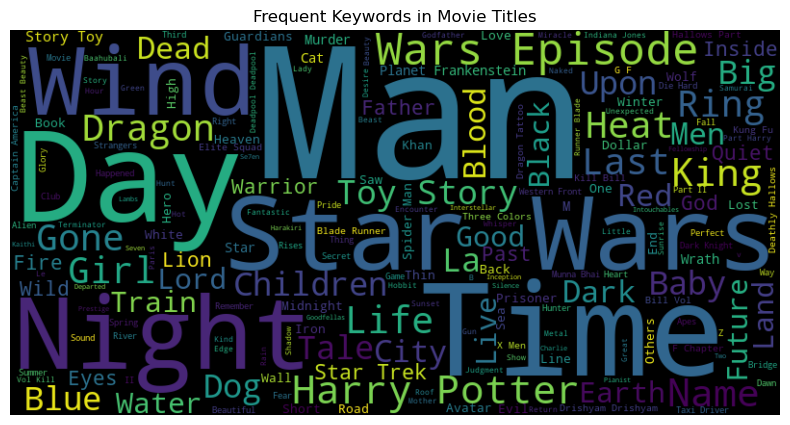

In [10]:
movie_titles = ' '.join(data['Movie_name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(movie_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Keywords in Movie Titles')
plt.show()

# Additional Features
# 1. Top 10 Movies with Highest Ratings

In [ ]:
highest_rated_movies = data.nlargest(10, 'Rating_from_10')[['Movie_name', 'Rating_from_10', 'Genre', 'Year']]

# 2. Distribution of Ratings

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating_from_10'], bins=20, kde=True, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Average Rating Per Year

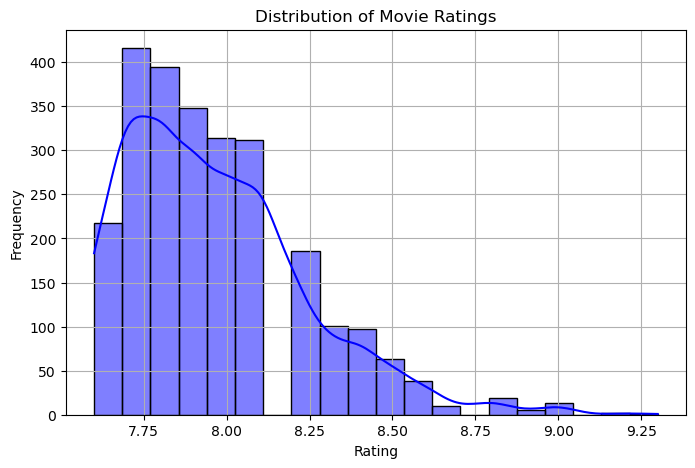

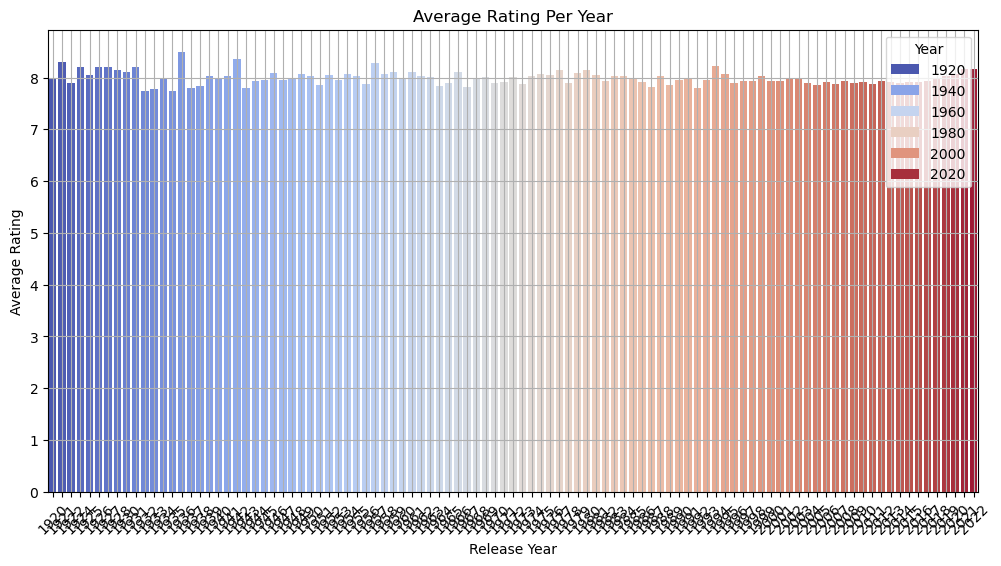

In [13]:
avg_rating_per_year = data.groupby('Year')['Rating_from_10'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_rating_per_year.index,hue=avg_rating_per_year.index, y=avg_rating_per_year.values, palette='coolwarm')
plt.title('Average Rating Per Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Display Results

In [12]:
print("Most Popular Genres:")
print(popular_genres)
print("\nAverage Ratings for Each Genre:")
print(avg_ratings_per_genre)
print("\nTop 10 Movies with Highest Ratings:")
print(highest_rated_movies)

Most Popular Genres:
Genre
Drama        729
Comedy       232
Crime        207
Action       201
Adventure    194
Thriller     135
Romance      125
Biography    108
Mystery      101
Animation     84
Sci-Fi        68
Fantasy       62
Family        53
War           50
History       47
Horror        36
Music         33
Film-Noir     22
Western       19
Musical       16
Sport         15
Name: count, dtype: int64

Average Ratings for Each Genre:
Genre
War          8.054000
Western      8.026316
Mystery      7.989109
Crime        7.987923
Sport        7.986667
Action       7.984080
Film-Noir    7.981818
Drama        7.979973
Sci-Fi       7.979412
Adventure    7.978351
Biography    7.973148
Musical      7.943750
Romance      7.942400
Fantasy      7.940323
History      7.936170
Family       7.935849
Animation    7.926190
Thriller     7.922963
Comedy       7.913793
Music        7.912121
Horror       7.850000
Name: Rating_from_10, dtype: float64

Top 10 Movies with Highest Ratings:
               